<h1> ANALYSIS ON TITANIC ACCIDENT <h1>

# INDRODUCTION: 
Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City with two other boarding ports, Cherbourg and Queenstown .The ship has three classes named Class 1-3.Huge number of passengers,families, crew members were sailing on the ship, Some survived and some didn't after the accident.

### Questions to explore:
1.How many passengers survived the Titanic ? 

2.Which gender survived with a higher count, Male or Female?

3.Which class had the most survivors?

4.From which port did survived passengers embark from?

5.Which age group survived most?

6.How many single passengers survived?

7.How many passengers along with atleast one of their family members survived?

8.How to find the unsurvived family member?

9.How many families survived?

In [48]:
#importing files and converting into data frames
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_name = pd.read_csv('titanic_data.csv')
titanic_df=pd.DataFrame(file_name)

# Given Data: 

In [49]:
titanic_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### DATA DESCRIPTION


<b>1.DATA DICTIONARY</b>

survival-Survival	
pclass-Ticket class	
sex-Sex	
Age-Age in years	
sibsp-# of siblings / spouses aboard the Titanic	
parch-# of parents / children aboard the Titanic	
ticket-Ticket number	
fare-Passenger fare	
cabin-Cabin number	
embarked-Port of Embarkation

<b>2.KEY</b>

0 = No, 1 = Yes

1 = 1st, 2 = 2nd, 3 = 3rd

C = Cherbourg, Q = Queenstown, S = Southampton


In [50]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>NOTE:</b> In the above data,the number of passengers travelled was 891 and the count for each column is same but for 'Age' it's 714 there might be some Data missing or Not mentioned in the 'Age'. It can be corrected by Data Wrangling

# Data Wrangling 

In [51]:
#finding number of missing values in the given data
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

>There are some missing values in variables 'Age' , 'Cabin' and 'Embarked'

In [52]:
#filling unknown in place of missing data in 'Embarked'
k='unknown'
titanic_df['Embarked'].fillna(k,inplace=True)


In [53]:
#filling the mean age in place of missing values
mean =round(titanic_df['Age'].mean(),2)
print mean
titanic_df['Age'].fillna(mean,inplace=True)
print titanic_df['Age'].describe()

29.7
count    891.000000
mean      29.699293
std       13.002015
min        0.420000
25%       22.000000
50%       29.700000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


Now the 'Age' column has been cleaned by filling the missing values with mean of Ages

In [54]:
# filling unknown in place of missing data in 'Cabin'
titanic_df['Cabin'].fillna('unknown',inplace=True)

In [55]:
#After Data Wrangling
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

><b>NOTE:</b> since there are lot of missing values in 'Cabin' .I fell this variable wouldn't help to analyse preciesly, for anlysis I'm ignoring this variable  

# Exploratory Analysis

# 1.Passenger Analysis

In [56]:
#total number of people survived
print 'Number of passengers survived:',len(titanic_df.loc[titanic_df['Survived']==1])

Number of passengers survived: 342


Among <b>891</b> passengers only <b><ins>342</ins></b> have survived.

### 1.1Analysis by gender

In [57]:
#number of people survived by gender
print 'passengers travelled by Gender'
print 'Sex'
print 'female ',len(titanic_df.loc[titanic_df['Sex']=='female'])
print 'male   ',len(titanic_df.loc[titanic_df['Sex']=='male'])
print '\nSurvival count by Gender'
print titanic_df.groupby('Sex')['Survived'].sum()
print '\nSurvival rate by Gender'
print titanic_df.groupby('Sex')['Survived'].mean()

passengers travelled by Gender
Sex
female  314
male    577

Survival count by Gender
Sex
female    233
male      109
Name: Survived, dtype: int64

Survival rate by Gender
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


The Survival count of <strong>FEMALES </strong>is grater than MALES 

<b>74%</b> of <strong>FEMALE</strong> passengers survived

### 1.2 Analysis by CLASS

In [58]:
print 'Number of passengers travelled by Class'
print 'Pclass'
print  '1   ',len(titanic_df.loc[titanic_df['Pclass']==1])
print '2   ',len(titanic_df.loc[titanic_df['Pclass']==2])
print '3   ',len(titanic_df.loc[titanic_df['Pclass']==3])
print '\nNumber of Passengers Survived by Class'
#number of people survived by class`
print titanic_df.groupby('Pclass')['Survived'].sum()
print '\nSurvival rate by Class'
print titanic_df.groupby('Pclass')['Survived'].mean()

Number of passengers travelled by Class
Pclass
1    216
2    184
3    491

Number of Passengers Survived by Class
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Survival rate by Class
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


##### Findings  from the above analysis:
1.The number of passengers travelled in <b> CLASS-3 </b> is higher than any other classes.

2.Passengers travelled in <b>CLASS -1</b> has more survivals.

3.The survival percentage of passengers travelled in <b>Class-1</b> is more compared to other two classes, about <b>62%</b> of passengers have survived.Apparently ,the survival percentage of passengers travelled in <b>Class-3</b> is very less
only <b>24%</b> of passengers have survived.

### 1.2 Analysis by PORT Embarked

In [59]:
print 'Number of passengers boarded by PORT'
print 'Embarked'
print  'C   ',len(titanic_df.loc[titanic_df['Embarked']=='C'])
print 'Q   ',len(titanic_df.loc[titanic_df['Embarked']=='Q'])
print 'S   ',len(titanic_df.loc[titanic_df['Embarked']=='S'])
print '\nNumber of passengers Survived by Embarked PORT'
#number of people survived by port embarked
print titanic_df.groupby('Embarked')['Survived'].sum()
print '\nSurvival rate by Embarked PORT'
print titanic_df.groupby('Embarked')['Survived'].mean()

Number of passengers boarded by PORT
Embarked
C    168
Q    77
S    644

Number of passengers Survived by Embarked PORT
Embarked
C           93
Q           30
S          217
unknown      2
Name: Survived, dtype: int64

Survival rate by Embarked PORT
Embarked
C          0.553571
Q          0.389610
S          0.336957
unknown    1.000000
Name: Survived, dtype: float64


##### Findings  from the above analysis:
1.<b> PORT-S </b> has the higest number of passengers boarded and Survivals too.

2.The survival percentage of passengers boarded from <b>PORT-C</b> is more compared to other two Ports, about <b>55%</b> of passengers have survived.Apparently ,the survival percentage of passengers boarded from  Ports <b>Q</b> and <b>S</b> is in between <b>33%-36%</b> only

3.It's 2 Females who embarked from the unknown port and both Survived

### 1.3Analysis by Gender,Class and Port Embarked

In [60]:
titanic_df.groupby(['Sex','Pclass','Embarked'])['Survived'].sum()

Sex     Pclass  Embarked
female  1       C           42
                Q            1
                S           46
                unknown      2
        2       C            7
                Q            2
                S           61
        3       C           15
                Q           24
                S           33
male    1       C           17
                Q            0
                S           28
        2       C            2
                Q            0
                S           15
        3       C           10
                Q            3
                S           34
Name: Survived, dtype: int64

##### Findings  from the above analysis:
1.Number of <b>FEMALE</b> survivers embarked at <b>PORT-S</b> and travelled in <b>CLASS-2</b> are more.

2.Number of <b>MALE</b> survivers embarked at <b>PORT-S</b> and travelled in <b>CLASS-3</b> are more.

3.<mark>MALES who travelled in <b>CLASS-1</b> and <b>CLASS-2</b> boarded at <b>PORT-Q</b> haven't survived</mark>

## 2. Analysis of Survivals by Visualisation

In [61]:
#collecting the data of passengers who survived 
survived=titanic_df.loc[(titanic_df['Survived']==1)]

In [62]:
#Data of passengers survived
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,unknown,C


### 2.1 Survivals by Age

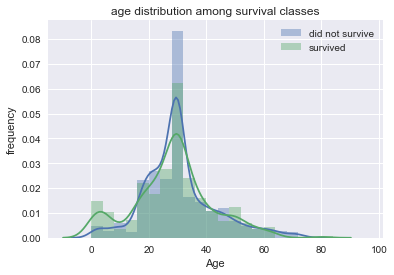

In [63]:
import seaborn as sns
age_bins = np.arange(0, 100, 4)
sns.distplot(titanic_df.loc[(titanic_df['Survived']==0) & (~titanic_df['Age'].isnull()),'Age'], bins=age_bins)
sns.distplot(titanic_df.loc[(titanic_df['Survived']==1) & (~titanic_df['Age'].isnull()),'Age'], bins=age_bins)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);

1.Most of the survivals belong to the age group 20-30

2.Since it is a <b>Normal Distribution</b> , The mean,mode and median are almost same.

3.Passengers who belong to age group 65-72 hasn't survived

### 2.2 Survaivals by Gender

Populating the interactive namespace from numpy and matplotlib


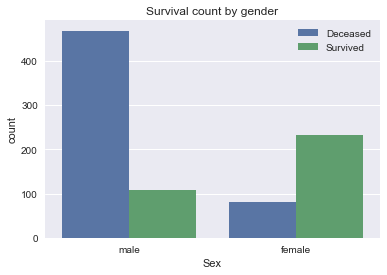

In [64]:
#Gender Visuilisation
%pylab inline
ax=sns.countplot(x='Sex',hue='Survived',data=titanic_df)
ax.legend(['Deceased','Survived'],title='')
ax.set_title('Survival count by gender');

> Deceased count of <b>Male</b> is higher than <b>Female</b> 

> Survival count of <b>FeMale</b> is higher than <b>male</b>

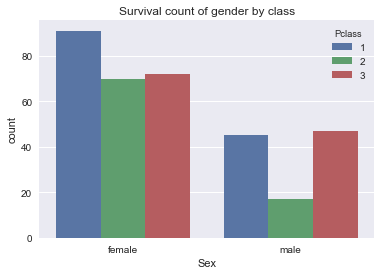

In [65]:
plt.figure()
sns.countplot(x='Sex',hue='Pclass',data=survived)
plt.title('Survival count of gender by class')

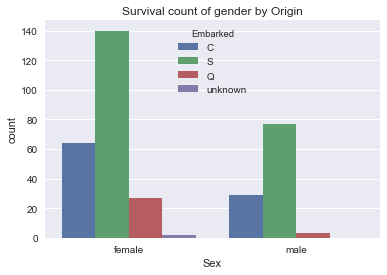

In [66]:
plt.figure()
sns.countplot(x='Sex',hue='Embarked',data=survived)
plt.title('Survival count of gender by Origin')

## 3.Family analysis

In [67]:
#number of Passengers who survived and dosen't have family

no_family=titanic_df['SibSp']+titanic_df['Parch']
len(titanic_df.loc[(no_family==0)&(titanic_df['Survived']==1),'SibSp'])

163

In [68]:
#number of passengers survived along with atleast one of their families 
families_survived=titanic_df.loc[((titanic_df['SibSp']!=0) | (titanic_df['Parch']!=0))&(titanic_df['Survived']==1)]
len(families_survived)

179

Among <b>342</b> survivals <b>163</b> passengers are single and dosen't have family onboard, and <b>179</b> passengers have families and atleast one of their family members survived 

In [69]:
families_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,unknown,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


since the members of a family have same <b>'Ticket'</b> number .It will be easier to identify the members of a family who survived .Below they are grouped by 'Ticket','Name' and 'family_count'

>  <b>Note:</b> Here the 'family_count' resembles to number of passengers from his/her family travelling in the ship 

In [70]:
#Setting 'Name ' as an index
ticket_index=families_survived.set_index('Name',inplace=False)
#Survived passengers and Family Members with Respect to 'Ticket'
ticket_index['family_count']=ticket_index['SibSp']+ticket_index['Parch']
ticket_index.groupby(['Ticket','Name','family_count'])['Survived'].mean()

Ticket             Name                                                                                family_count
110413             Taussig, Miss. Ruth                                                                 2               1
                   Taussig, Mrs. Emil (Tillie Mandelbaum)                                              2               1
110813             Warren, Mrs. Frank Manley (Anna Sophia Atkinson)                                    1               1
111361             Hippach, Miss. Jean Gertrude                                                        1               1
                   Hippach, Mrs. Louis Albert (Ida Sophia Fischer)                                     1               1
113505             Bowerman, Miss. Elsie Edith                                                         1               1
                   Chibnall, Mrs. (Edith Martha Bowerman)                                              1               1
113760             Carter, Master. Wi

### 3.1 Finding the unsurvived Family Member

In [71]:
#changing index to 'Ticket'
titanic_ticket_index=titanic_df.set_index('Ticket',inplace=False)
family=ticket_index.merge(titanic_df,on='Ticket',how='inner')  
family[['Ticket','Name']].groupby('Ticket')

In [72]:
#list of passengers grouped  by 'Ticket' and atleast one family member survived 
Family=family.set_index('Ticket',inplace=False)
Family['family_count']=Family['SibSp_y']+Family['Parch_y']
Family.groupby(['Ticket','Name','family_count'])['Survived_y'].mean()

Ticket             Name                                                                                family_count
110413             Taussig, Miss. Ruth                                                                 2               1
                   Taussig, Mr. Emil                                                                   2               0
                   Taussig, Mrs. Emil (Tillie Mandelbaum)                                              2               1
110813             Warren, Mrs. Frank Manley (Anna Sophia Atkinson)                                    1               1
111361             Hippach, Miss. Jean Gertrude                                                        1               1
                   Hippach, Mrs. Louis Albert (Ida Sophia Fischer)                                     1               1
113505             Bowerman, Miss. Elsie Edith                                                         1               1
                   Chibnall, Mrs. (Ed

<b>Note</b>: Here 'family_count' resembles to number of persons from his/her family travelling in the boat .In the last column '1' and '0' resembles passenger survived or not (1= survived,0=not survived) <p>

<b>4</b> families have survived ie..the families belong to ticket numbers '113760','111361','113505' and '113806' have survived.

# CONCLUSION: 
Since There is no data given regarding the crew members on the ship, it seemed difficult to analyse the crew members survived,more over there are certain limitations in the analysis like 'Age' factor for certain passengers was missing and it was replaced with mean  of 'Age' by Data Wragling .

> I hope all the questions posed met their respective solutions by analysis mentioned above.

> A breif analysis of given data and answers for the posed questions are mentioned below

1.Among 891 passengers only 342 have survived.

2.The Survival count of FEMALES is grater than MALES.

3.CLASS-1 has more survivals.

4.PORT-S has the higest number of passengers boarded and Survivals too.

5.passsengers belongs to Age group 20-30 survived more.

6.163 single passengers survived.

7.Among survivals 179 passengers have families and atleast one of their family members survived.

8.check <ins>3.1</ins> to know about the missing family member who didn't survive along with survived family member of the same family.

9.FOUR Families survived the disaster.